In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from yahoofinancials import YahooFinancials
%matplotlib inline

# Download Data

In [2]:
start_date = '2017-01-01'
end_date = '2017-12-31'
stock_code = 'NVDA'

In [3]:
stock_data = YahooFinancials(stock_code).get_historical_price_data(start_date, end_date, 'daily')
price_data = stock_data[stock_code]['prices']

In [4]:
columns = ['formatted_date', 'open', 'high', 'low', 'close', 'adjclose', 'volume']
new_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
# order dataframe columns
df = pd.DataFrame(data=price_data)[columns]
# rename dataframe columns
df = df.rename(index=str, columns=dict(zip(columns, new_columns)))

In [5]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,104.400002,106.370003,99.379997,102.010002,101.111633,37549900
1,2017-01-04,103.400002,105.500000,101.529999,104.389999,103.470665,29980500
2,2017-01-05,104.529999,105.820000,101.050003,101.739998,100.844017,24607400
3,2017-01-06,102.849998,104.250000,101.199997,103.099998,102.192032,20571400
4,2017-01-09,103.500000,108.000000,103.500000,107.279999,106.335220,22857700
5,2017-01-10,107.809998,109.190002,105.629997,106.470001,105.532349,22023000
6,2017-01-11,106.000000,106.199997,104.150002,105.160004,104.233887,13141600
7,2017-01-12,104.230003,104.699997,101.620003,103.440002,102.529037,15640400
8,2017-01-13,103.599998,105.000000,103.059998,103.430000,102.519119,11445500
9,2017-01-17,103.000000,103.199997,100.570000,101.110001,100.219559,14497600


In [6]:
# save to 'data' directory
df.to_csv('../data/{}_{}.csv'.format(stock_code, start_date[:4]))

Alternatively, we can go to https://finance.yahoo.com/ to look up a stock and download its historical data by setting the stock's time period and frequency.

# Visualize Data

In [7]:
df = pd.read_csv('../data/^GSPC_2016.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,2038.199951,2038.199951,1989.680054,2012.660034,2012.660034,4304880000
1,2016-01-05,2013.780029,2021.939941,2004.170044,2016.709961,2016.709961,3706620000
2,2016-01-06,2011.709961,2011.709961,1979.050049,1990.260010,1990.260010,4336660000
3,2016-01-07,1985.319946,1985.319946,1938.829956,1943.089966,1943.089966,5076590000
4,2016-01-08,1945.969971,1960.400024,1918.459961,1922.030029,1922.030029,4664940000
5,2016-01-11,1926.119995,1935.650024,1901.099976,1923.670044,1923.670044,4607290000
6,2016-01-12,1927.829956,1947.380005,1914.349976,1938.680054,1938.680054,4887260000
7,2016-01-13,1940.339966,1950.329956,1886.410034,1890.280029,1890.280029,5087030000
8,2016-01-14,1891.680054,1934.469971,1878.930054,1921.839966,1921.839966,5241110000
9,2016-01-15,1916.680054,1916.680054,1857.829956,1880.329956,1880.329956,5468460000


In [8]:
df.shape

(252, 7)

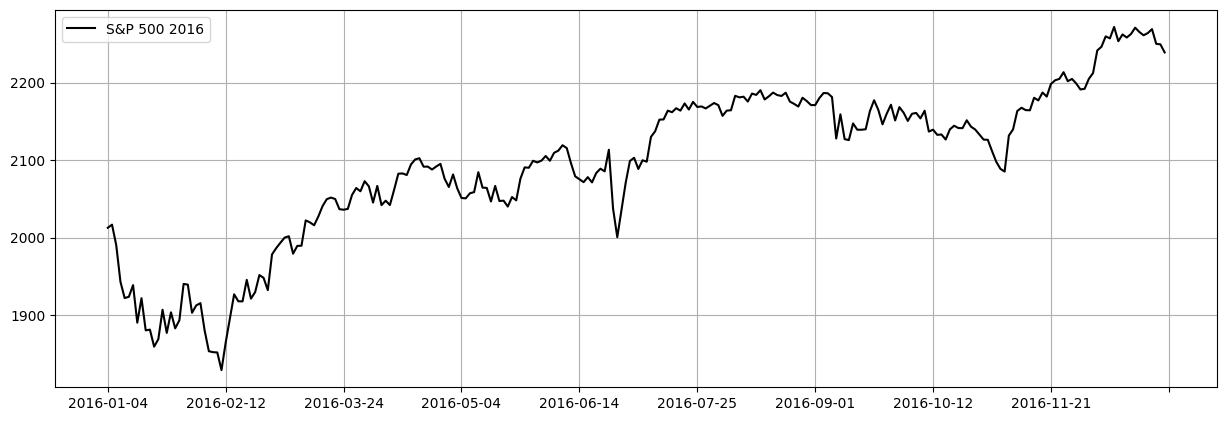

In [9]:
plt.figure(figsize=(15, 5), dpi=100)
plt.plot(df['Date'], df['Close'], color='black', label='S&P 500 2016')
plt.xticks(np.linspace(0, len(df), 10))
plt.legend()
plt.grid()

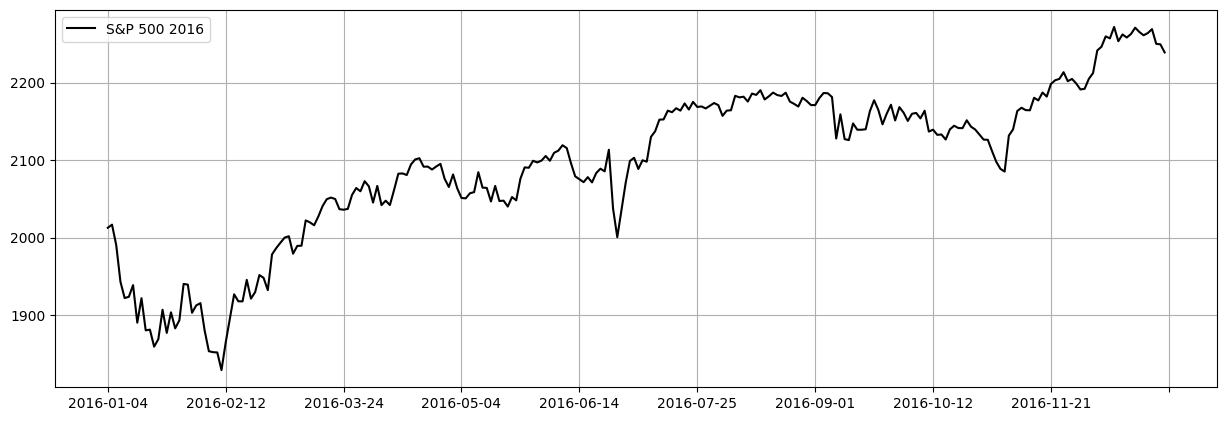

In [10]:
fig = plt.figure(figsize=(15, 5), dpi=100)
ax = fig.add_subplot(1,1,1)
ax.plot(df['Date'], df['Close'], color='black', label='S&P 500 2016')
ax.set_xticks(np.linspace(0, len(df), 10))
ax.legend()
ax.grid()